<a href="https://colab.research.google.com/github/DaniGa-Mo/Challenge_Alura_Store/blob/main/AluraStoreLatam_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación


In [2]:
# Ingresos totales de la tienda 1.
ingresos1 = tienda.Precio.sum()
print(f'Los ingresos totales de la tienda 1 son: {ingresos1}')


Los ingresos totales de la tienda 1 son: 1150880400.0


In [4]:
# Ingresos totales de la tienda 2.
ingresos2 = tienda2.Precio.sum()
print(f'Los ingresos totales de la tienda 2 son: {ingresos2}')

Los ingresos totales de la tienda 2 son: 1116343500.0


In [5]:
# Ingresos totales de la tienda 3.
ingresos3 = tienda3.Precio.sum()
print(f'Los ingresos totales de la tienda 3 son: {ingresos3}')

Los ingresos totales de la tienda 3 son: 1098019600.0


In [6]:
# Ingresos totales de la tienda 4.
ingresos4 = tienda4.Precio.sum()
print(f'Los ingresos totales de la tienda 4 son: {ingresos4}')

Los ingresos totales de la tienda 4 son: 1038375700.0


In [7]:
# Dataframe resumen de ingresos totales.
ingresos = pd.DataFrame({
    'Tiendas': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingresos': [ingresos1, ingresos2, ingresos3, ingresos4 ]
})

print('Resumen ingresos:')
print(ingresos)

Resumen ingresos:
    Tiendas      Ingresos
0  Tienda 1  1.150880e+09
1  Tienda 2  1.116344e+09
2  Tienda 3  1.098020e+09
3  Tienda 4  1.038376e+09


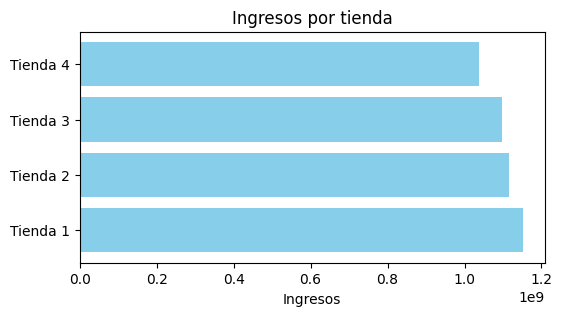

In [8]:
# Gráfico ingresos por tienda.
plt.figure(figsize=(6,3))
plt.barh(ingresos['Tiendas'], ingresos['Ingresos'], color='skyblue')
plt.xlabel('Ingresos')
plt.title('Ingresos por tienda')
plt.show()


# 2. Ventas por categoría

In [9]:
# Agrupación de los productos por su categoría y posterior visualización de las más populares de la tienda 1.
t1_categorias = tienda.groupby('Categoría del Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False)
print(t1_categorias)


Categoría del Producto
Muebles                    1446
Electrónicos               1341
Electrodomésticos           906
Juguetes                    872
Deportes y diversión        796
Instrumentos musicales      573
Libros                      520
Artículos para el hogar     489
Name: Cantidad de cuotas, dtype: int64


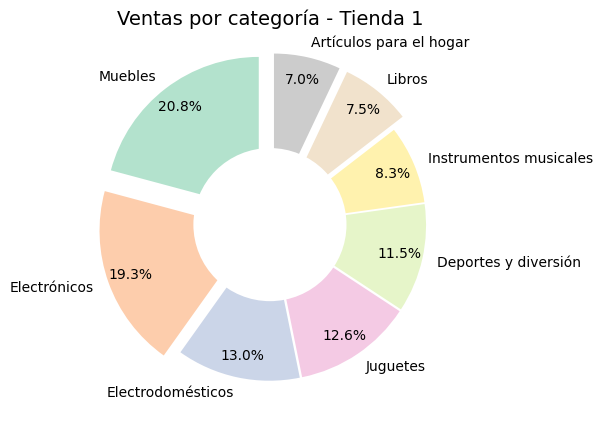

In [10]:
# Gráfico ilusitrativo ventas por categoria Tienda 1.
# Paleta de colores moderna.
cmap = colormaps['Pastel2']
colors = cmap(np.linspace(0, 1, len(t1_categorias)))

# Identificar las 2 más y las 2 menos vendidas.
top2 = t1_categorias.nlargest(2).index
bottom2 = t1_categorias.nsmallest(2).index

# Crear lista de "explode" para destacar top2 y bottom2.
explode = [
    0.12 if cat in top2 or cat in bottom2 else 0.02
    for cat in t1_categorias.index
]

# Crear figura.
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    t1_categorias,
    labels=t1_categorias.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    colors=colors,
    explode=explode
)

# Crear círculo blanco central (efecto donut).
centro = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro)

# Título y ajustes finales.
plt.title('Ventas por categoría - Tienda 1', fontsize=14)
plt.tight_layout()
plt.show()




In [11]:
# Agrupación de los productos por su categoría y posterior visualización de las más populares de la tienda 2.
t2_categorias = tienda2.groupby('Categoría del Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False)
print(t2_categorias)

Categoría del Producto
Electrónicos               1333
Muebles                    1265
Electrodomésticos           890
Juguetes                    876
Deportes y diversión        720
Instrumentos musicales      659
Libros                      611
Artículos para el hogar     493
Name: Cantidad de cuotas, dtype: int64


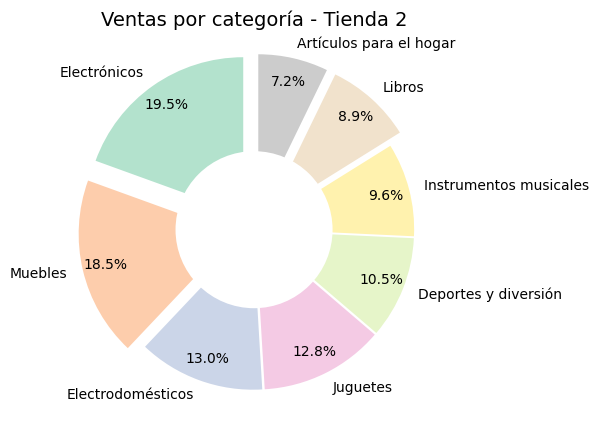

In [12]:
# Gráfico ilusitrativo ventas por categoria Tienda 2.
# Paleta de colores moderna.
cmap = colormaps['Pastel2']
colors = cmap(np.linspace(0, 1, len(t2_categorias)))

# Identificar las 2 más y las 2 menos vendidas.
top2 = t2_categorias.nlargest(2).index
bottom2 = t2_categorias.nsmallest(2).index

# Crear lista de "explode" para destacar top2 y bottom2.
explode = [
    0.12 if cat in top2 or cat in bottom2 else 0.02
    for cat in t2_categorias.index
]

# Crear figura.
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    t2_categorias,
    labels=t2_categorias.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    colors=colors,
    explode=explode
)

# Crear círculo blanco central (efecto donut).
centro = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro)

# Título y ajustes finales.
plt.title('Ventas por categoría - Tienda 2', fontsize=14)
plt.tight_layout()
plt.show()

In [13]:
# Agrupación de los productos por su categoría y posterior visualización de las más populares de la tienda 3.
t3_categorias = tienda3.groupby('Categoría del Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False)
print(t3_categorias)

Categoría del Producto
Muebles                    1408
Electrónicos               1262
Juguetes                    937
Electrodomésticos           882
Deportes y diversión        873
Instrumentos musicales      580
Artículos para el hogar     542
Libros                      517
Name: Cantidad de cuotas, dtype: int64


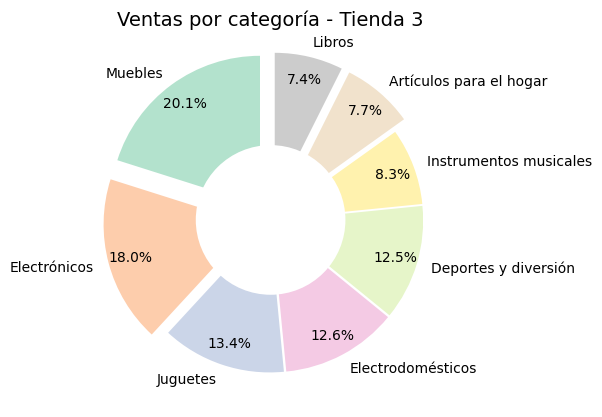

In [14]:
# Gráfico ilusitrativo ventas por categoria Tienda 3.
# Paleta de colores moderna.
cmap = colormaps['Pastel2']
colors = cmap(np.linspace(0, 1, len(t3_categorias)))

# Identificar las 2 más y las 2 menos vendidas.
top2 = t3_categorias.nlargest(2).index
bottom2 = t3_categorias.nsmallest(2).index

# Crear lista de "explode" para destacar top2 y bottom2.
explode = [
    0.12 if cat in top2 or cat in bottom2 else 0.02
    for cat in t3_categorias.index
]

# Crear figura.
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    t3_categorias,
    labels=t3_categorias.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    colors=colors,
    explode=explode
)

# Crear círculo blanco central (efecto donut).
centro = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro)

# Título y ajustes finales.
plt.title('Ventas por categoría - Tienda 3', fontsize=14)
plt.tight_layout()
plt.show()

In [15]:
# Agrupación de los productos por su categoría y posterior visualización de las más populares de la tienda 4.
t4_categorias = tienda4.groupby('Categoría del Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False)
print(t4_categorias)

Categoría del Producto
Muebles                    1392
Electrónicos               1293
Juguetes                    921
Deportes y diversión        786
Electrodomésticos           756
Libros                      591
Artículos para el hogar     590
Instrumentos musicales      500
Name: Cantidad de cuotas, dtype: int64


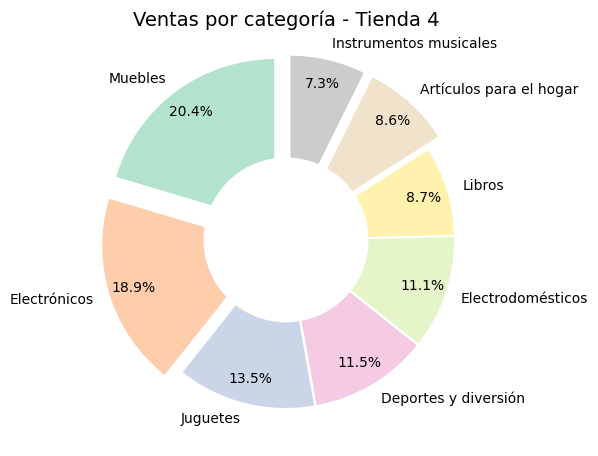

In [16]:
# Gráfico ilusitrativo ventas por categoria Tienda 4.
# Paleta de colores moderna.
cmap = colormaps['Pastel2']
colors = cmap(np.linspace(0, 1, len(t4_categorias)))

# Identificar las 2 más y las 2 menos vendidas.
top2 = t4_categorias.nlargest(2).index
bottom2 = t4_categorias.nsmallest(2).index

# Crear lista de "explode" para destacar top2 y bottom2.
explode = [
    0.12 if cat in top2 or cat in bottom2 else 0.02
    for cat in t4_categorias.index
]

# Crear figura.
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    t4_categorias,
    labels=t4_categorias.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    colors=colors,
    explode=explode
)

# Crear círculo blanco central (efecto donut).
centro = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro)

# Título y ajustes finales.
plt.title('Ventas por categoría - Tienda 4', fontsize=14)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [17]:
# Calcular las calificacion promedio.
print(f'La calificación promedio de los clientes para la tienda 1 es: {tienda.Calificación.mean():.2f} de {tienda.Calificación.max()}.')

La calificación promedio de los clientes para la tienda 1 es: 3.98 de 5.


In [18]:
# Calcular las calificacion promedio.
print(f'La calificación promedio de los clientes para la tienda 2 es: {tienda2.Calificación.mean():.2f} de {tienda2.Calificación.max()}.')

La calificación promedio de los clientes para la tienda 2 es: 4.04 de 5.


In [19]:
# Calcular las calificacion promedio.
print(f'La calificación promedio de los clientes para la tienda 3 es: {tienda3.Calificación.mean():.2f} de {tienda3.Calificación.max()}.')

La calificación promedio de los clientes para la tienda 3 es: 4.05 de 5.


In [20]:
# Calcular las calificacion promedio.
print(f'La calificación promedio de los clientes para la tienda 4 es: {tienda4.Calificación.mean():.2f} de {tienda4.Calificación.max()}.')

La calificación promedio de los clientes para la tienda 4 es: 4.00 de 5.


# 4. Productos más y menos vendidos

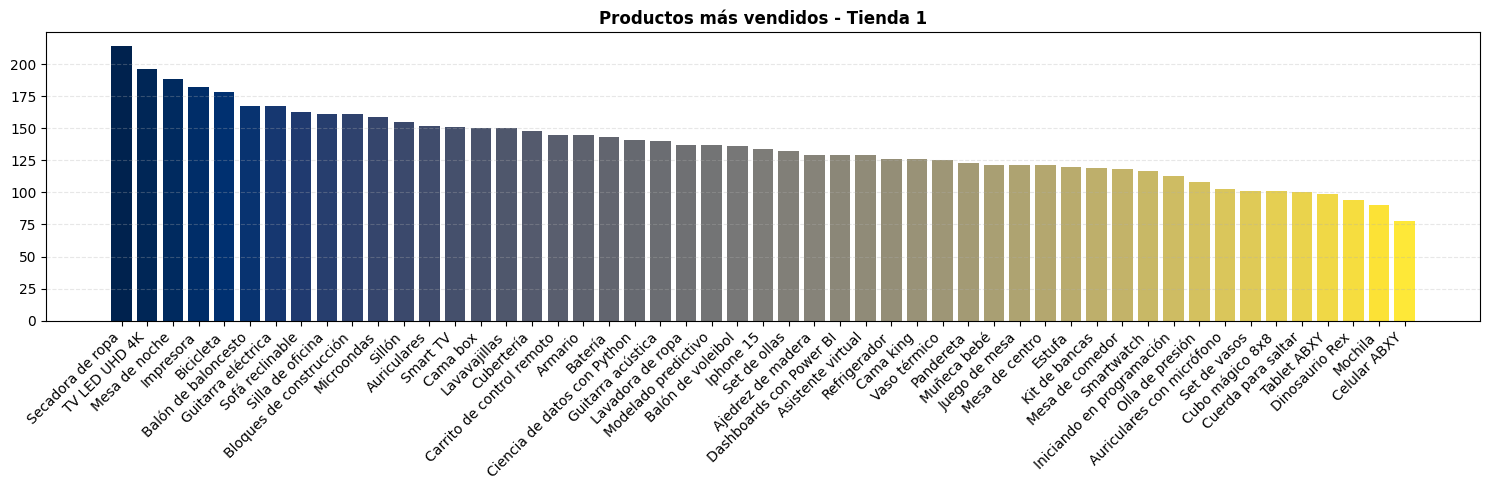

In [21]:
# Tienda 1
# Agrupación de las cantidades de productos vendidos.
vendidos = tienda.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).reset_index()

# Generar colores de la paleta cividis.
cmap = colormaps['cividis'].resampled(len(vendidos))
colores = [cmap(i) for i in range(len(vendidos))]

# Gráfico.
plt.figure(figsize=(15,5))
plt.bar(vendidos['Producto'], vendidos['Cantidad de cuotas'], color=colores)
plt.title('Productos más vendidos - Tienda 1',fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()




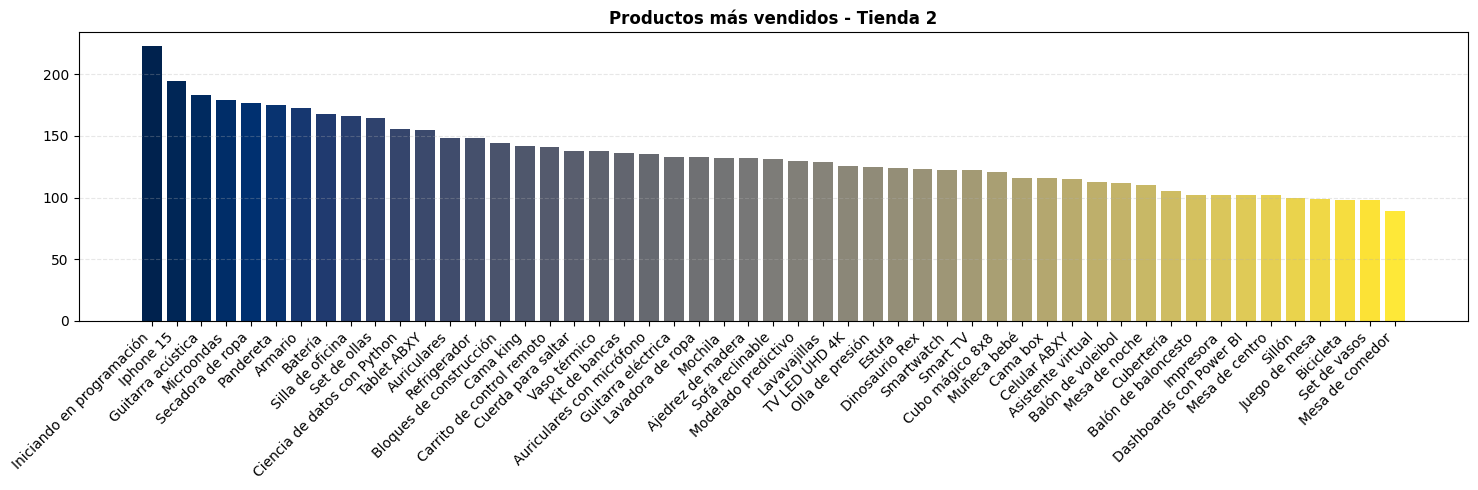

In [22]:
# Tienda 2
# Agrupación de las cantidades de productos vendidos.
vendidos2 = tienda2.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).reset_index()

# Generar colores de la paleta cividis.
cmap = colormaps['cividis'].resampled(len(vendidos2))
colores = [cmap(i) for i in range(len(vendidos2))]

# Gráfico.
plt.figure(figsize=(15,5))
plt.bar(vendidos2['Producto'], vendidos2['Cantidad de cuotas'], color=colores)
plt.title('Productos más vendidos - Tienda 2',fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

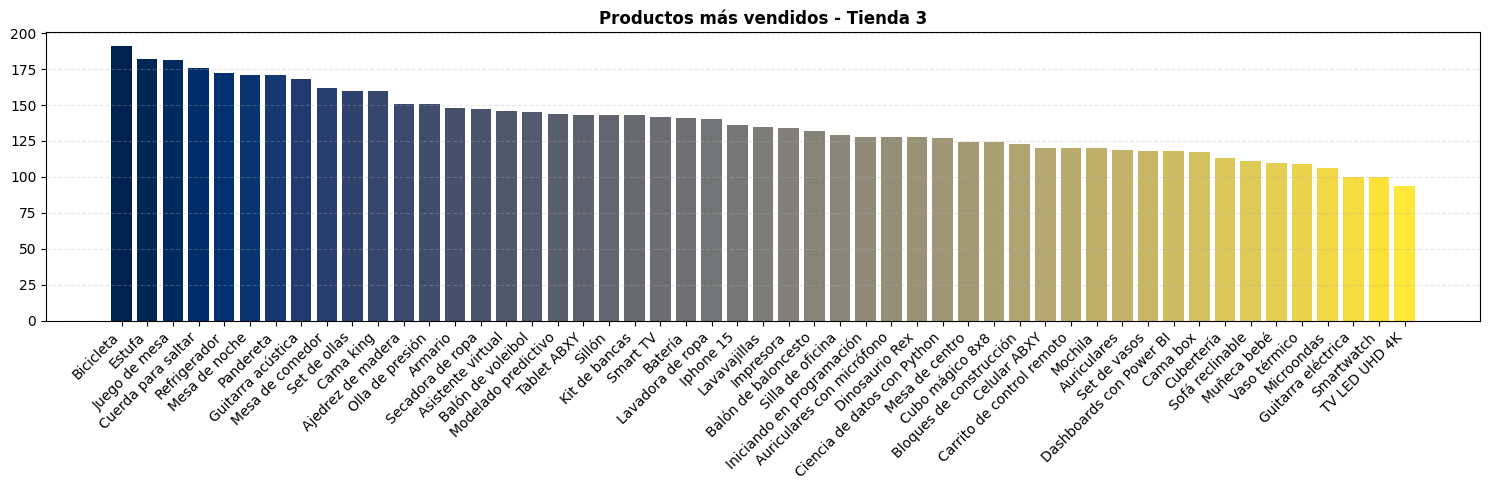

In [23]:
# Tienda 3
# Agrupación de las cantidades de productos vendidos.
vendidos3 = tienda3.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).reset_index()

# Generar colores de la paleta cividis.
cmap = colormaps['cividis'].resampled(len(vendidos3))
colores = [cmap(i) for i in range(len(vendidos3))]

# Gráfico.
plt.figure(figsize=(15,5))
plt.bar(vendidos3['Producto'], vendidos3['Cantidad de cuotas'], color=colores)
plt.title('Productos más vendidos - Tienda 3',fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

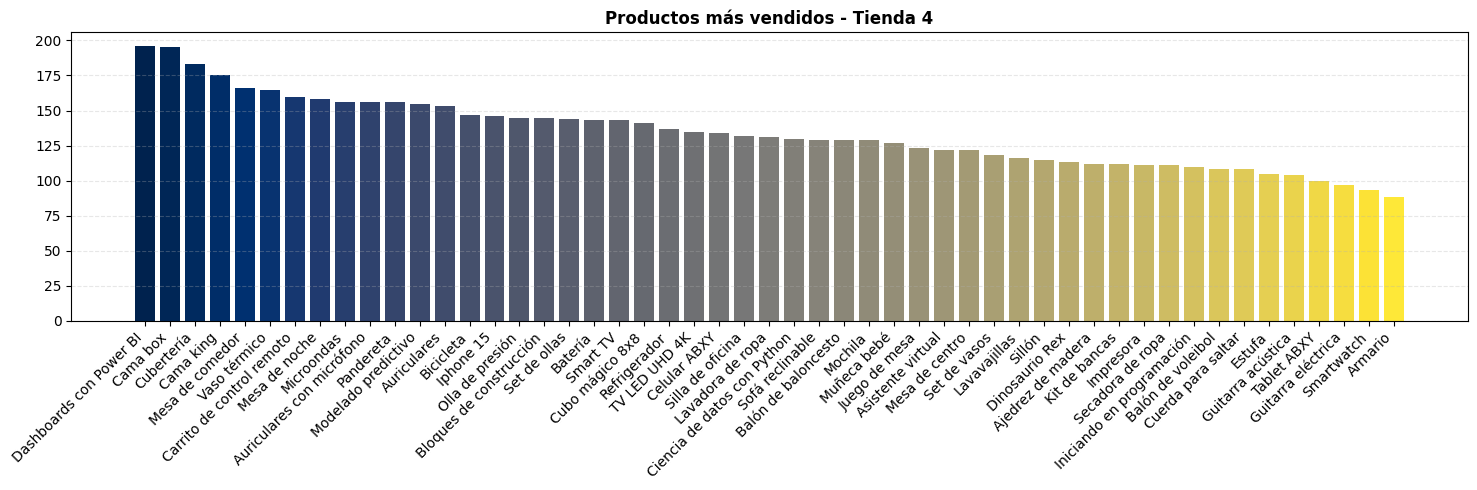

In [24]:
# Tienda 4
# Agrupación de las cantidades de productos vendidos.
vendidos4 = tienda4.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).reset_index()

# Generar colores de la paleta cividis.
cmap = colormaps['cividis'].resampled(len(vendidos4))
colores = [cmap(i) for i in range(len(vendidos4))]

# Gráfico.
plt.figure(figsize=(15,5))
plt.bar(vendidos4['Producto'], vendidos4['Cantidad de cuotas'], color=colores)
plt.title('Productos más vendidos - Tienda 4',fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [25]:
# Tienda 1.
print(f"El valor promedio del envio de la Tienda 1 es: {round(tienda['Costo de envío'].mean(),2)}.")

El valor promedio del envio de la Tienda 1 es: 26018.61.


In [26]:
# Tienda 2.
print(f"El valor promedio del envio de la Tienda 2 es: {round(tienda2['Costo de envío'].mean(),2)}.")

El valor promedio del envio de la Tienda 2 es: 25216.24.


In [27]:
# Tienda 3.
print(f"El valor promedio del envio de la Tienda 3 es: {round(tienda3['Costo de envío'].mean(),2)}.")

El valor promedio del envio de la Tienda 3 es: 24805.68.


In [28]:
# Tienda 4.
print(f"El valor promedio del envio de la Tienda 4 es: {round(tienda4['Costo de envío'].mean(),2)}.")

El valor promedio del envio de la Tienda 4 es: 23459.46.


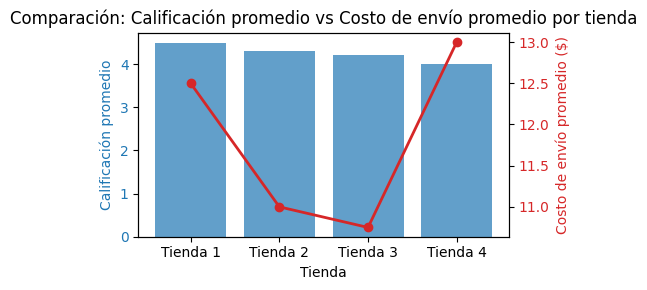

In [33]:
# DataFrame con el resumen de la calificació de los clientes y coste envio.
resumen = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación promedio': [4.5, 4.3, 4.2, 4.0],
    'Costo envío promedio': [12.5, 11.0, 10.75, 13.0]
})

# Crear gráfico combinado (barras + línea)
fig, ax1 = plt.subplots(figsize=(5,3))

# Barras: calificación promedio
color = 'tab:blue'
ax1.bar(resumen['Tienda'], resumen['Calificación promedio'], color=color, alpha=0.7, label='Calificación promedio')
ax1.set_xlabel('Tienda')
ax1.set_ylabel('Calificación promedio', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Eje secundario: costo de envío
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(resumen['Tienda'], resumen['Costo envío promedio'], color=color, marker='o', linewidth=2, label='Costo de envío promedio')
ax2.set_ylabel('Costo de envío promedio ($)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Comparación: Calificación promedio vs Costo de envío promedio por tienda')
plt.tight_layout()
plt.show()


####**¡Extra! Análisis del desempeño geográfico**

Mapas de calor (Heatmaps)

Tiendas 1, 2 y 3: Presentan patrones de concentración de ventas en diversas áreas geográficas, indicando una distribución más amplia de clientes y actividad comercial en distintas ubicaciones. Esto sugiere que estas tiendas tienen una presencia más consolidada en el mercado y logran atraer clientes de diferentes zonas.

Tienda 4: A diferencia de las otras tiendas, el mapa de calor de la Tienda 4 muestra una concentración de ventas menos dispersa y posiblemente más enfocada en áreas específicas. Esto podría indicar una base de clientes más localizada o una menor penetración en otras regiones geográficas.

In [71]:
# Descripción de los datos.
print(tienda[['lat', 'lon']].describe())
print(tienda2[['lat', 'lon']].describe())
print(tienda3[['lat', 'lon']].describe())
print(tienda4[['lat', 'lon']].describe())

               lat          lon
count  2359.000000  2359.000000
mean      5.365283   -74.789417
std       2.287445     1.217827
min      -4.215280   -77.281110
25%       4.609710   -75.563590
50%       4.609710   -74.199040
75%       6.251840   -74.081750
max      11.544440   -67.923900
               lat          lon
count  2359.000000  2359.000000
mean      5.499753   -74.742963
std       2.351118     1.185997
min      -4.215280   -77.281110
25%       4.609710   -75.563590
50%       4.609710   -74.199040
75%       6.251840   -74.081750
max      11.544440   -67.923900
               lat          lon
count  2359.000000  2359.000000
mean      5.437076   -74.733463
std       2.405272     1.224572
min      -4.215280   -77.281110
25%       4.609710   -75.563590
50%       4.609710   -74.199040
75%       6.251840   -74.081750
max      11.544440   -67.923900
               lat          lon
count  2358.000000  2358.000000
mean      5.413519   -74.774597
std       2.376728     1.199749
min     

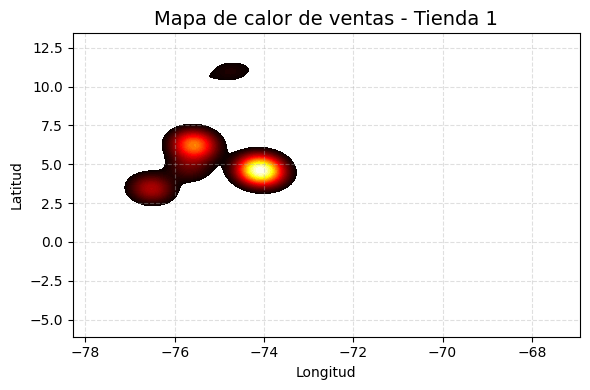

In [81]:
# Mapa de calor tienda 1.
# Datos.
geo1 = tienda[['lat', 'lon']]

# Crear figura.
plt.figure(figsize=(6,4))
sns.kdeplot(
    x=geo1['lon'],
    y=geo1['lat'],
    fill=True,
    cmap='hot',
    thresh=0.2, # Ajustado el umbral a 0.2
    levels=50
)
plt.title("Mapa de calor de ventas - Tienda 1", fontsize=14)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

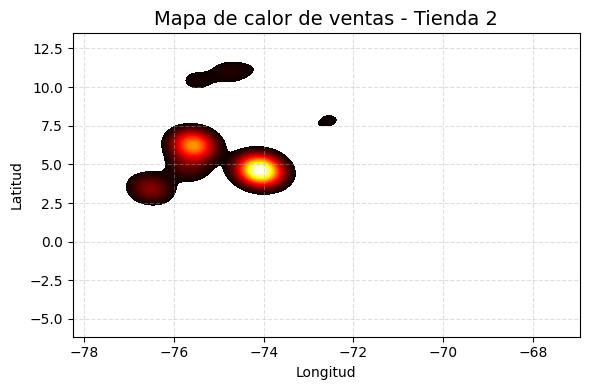

In [82]:
# Mapa de calor tienda 2.
# Datos.
geo2 = tienda2[['lat', 'lon']]

# Crear figura.
plt.figure(figsize=(6,4))
sns.kdeplot(
    x=geo2['lon'],
    y=geo2['lat'],
    fill=True,
    cmap='hot',
    thresh=0.2,
    levels=50
)
plt.title("Mapa de calor de ventas - Tienda 2", fontsize=14)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

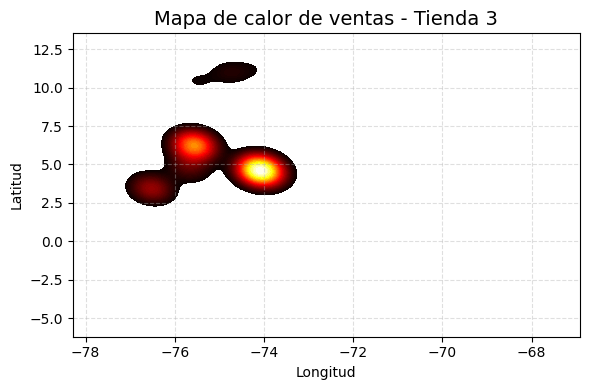

In [83]:
# Mapa de calor tienda 3.
# Datos.
geo3 = tienda3[['lat', 'lon']]

# Crear figura.
plt.figure(figsize=(6,4))
sns.kdeplot(
    x=geo3['lon'],
    y=geo3['lat'],
    fill=True,
    cmap='hot',
    thresh=0.2, # Ajustado el umbral a 0.2
    levels=50
)
plt.title("Mapa de calor de ventas - Tienda 3", fontsize=14)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

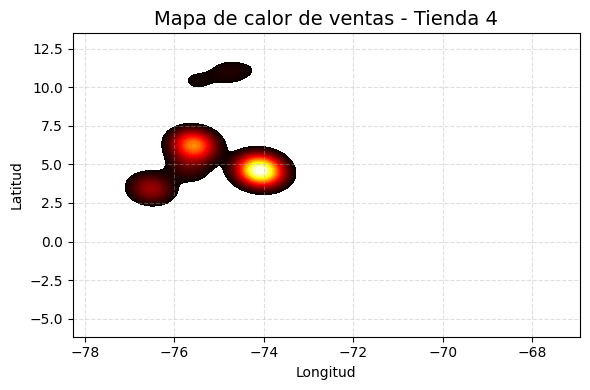

In [84]:
# Mapa de calor tienda 4.
# Datos.
geo4 = tienda4[['lat', 'lon']]

# Crear figura.
plt.figure(figsize=(6,4))
sns.kdeplot(
    x=geo4['lon'],
    y=geo4['lat'],
    fill=True,
    cmap='hot',
    thresh=0.2, # Ajustado el umbral a 0.2
    levels=50
)
plt.title("Mapa de calor de ventas - Tienda 4", fontsize=14)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


#**Informe Final**

**Análisis de Tiendas y Recomendación de Venta**


##**Autor**: *Daniel Gallardo M.*


---



### Introducción
El objetivo de este informe es analizar los datos de las cuatro tiendas de la cadena Alura Store para identificar la menos eficiente, con el fin de que el Sr. Juan considere venderla para iniciar un nuevo emprendimiento. Para esto, se evaluaron distintos factores clave:


*   Ingresos totales de cada tienda.
*   Categorías de productos más y menos vendidas.
*   Productos más y menos vendidos.
*   Calificación promedio de los clientes.
*   Coste de envío promedio por tienda.

Se realizaron análisis cuantitativos y gráficos para comparar de manera objetiva el rendimiento de cada tienda.




















###Desarrollo del análisis

####1.- Ingresos totales por tienda

Se calcularon los ingresos totales de cada tienda sumando el precio de todos los productos vendidos.

Resumen ingresos:


```
Resumen ingresos:
  Tiendas      Ingresos
  Tienda 1     1.150.880.000
  Tienda 2     1.116.344.000
  Tienda 3     1.098.020.000
  Tienda 4     1.038.376.000
```




**Interpretación:**

La Tienda 4 tiene los ingresos más bajos, lo que indica menor volumen de ventas o productos de menor valor. Esto la convierte en una candidata principal para la venta.

**Gráfico**

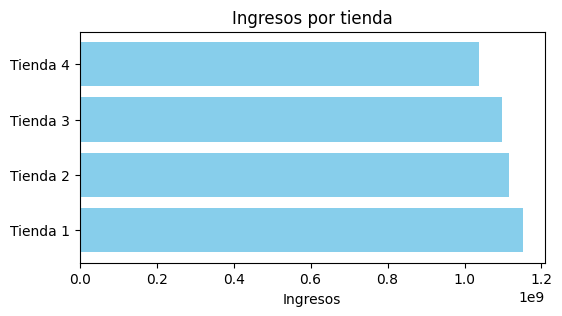


####2.- Categorías de productos más y menos vendidas

Se analizó la cantidad de ventas por categoría para cada tienda.

Tienda 4:



*   Más vendidas: Muebles, electrónicos.
*   Menos vendidas: Articulos para el hogar y Intrumentos musicales.


**Interpretación:**

La Tienda 4 no tiene problemas de diversificación, ya que sus categorías populares son similares a las demás tiendas. Sin embargo, su eficiencia global es menor, porque genera menos ingresos absolutos, lo que contribuye a su menor desempeño general.

**Gráfico**

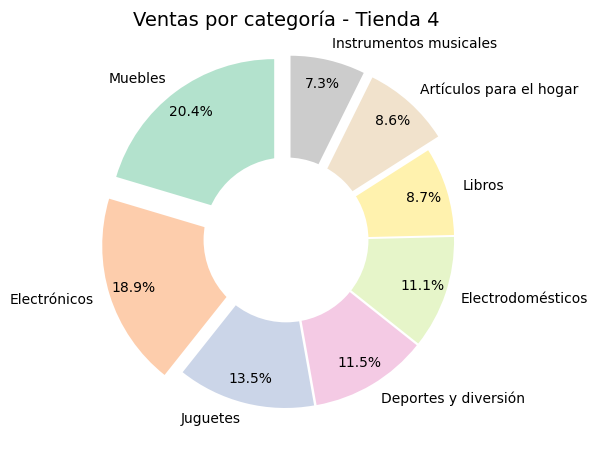

####3.- Productos más y menos vendidos

Los productos mas vendidos por la tienda son: Dashboards con Power Bi y Cama box.

Los productos menos vendidos son: Smartwatch y Armario.

**Interpretación:**

Aunque la Tienda 4 mantiene un flujo constante en ventas y una similitud en categorias populares con las demás tiendas, así como también en las menos populares, su volumen total es menor y los productos de baja rotación ocupan más peso relativo en el inventario. Esto refleja menor eficiencia operativa y comercial, reforzando la decisión de venderla.

**Gráfico**

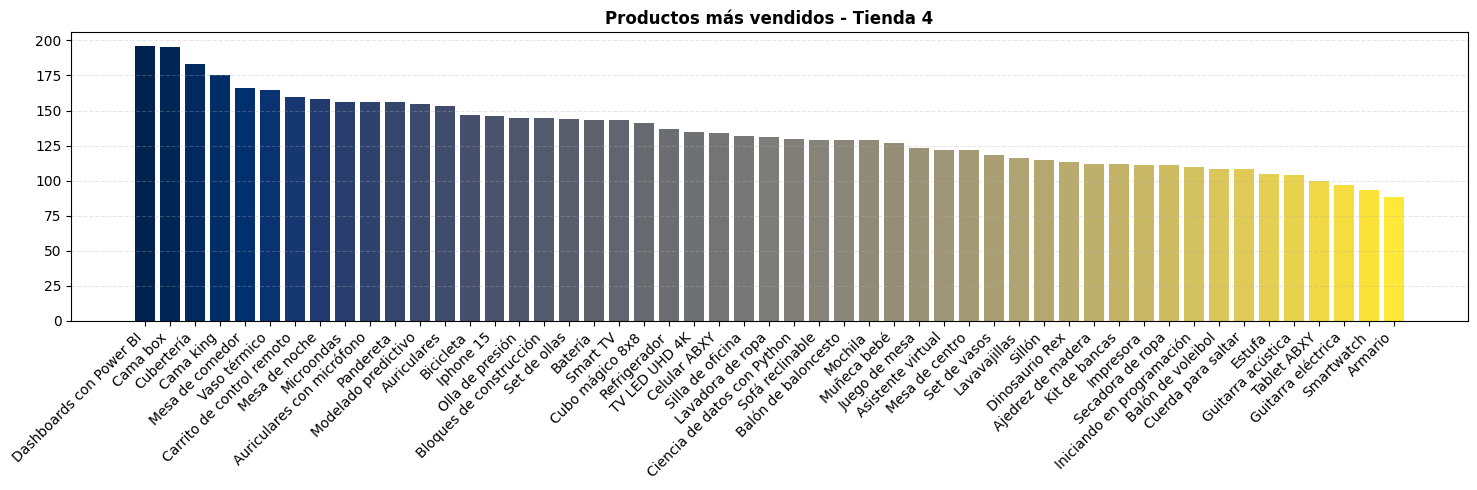

####4.- Calificación promedio de los clientes

Se calculó la calificación promedio de los clientes por tienda:



```
Tienda	  Calificación promedio
Tienda 1	4,5
Tienda 2	4,3
Tienda 3	4,2
Tienda 4	4,0

```

**Interpretación:**

La Tienda 4 tiene la calificación más baja, lo que indica menor satisfacción del cliente y posible impacto negativo en fidelización y reputación.



####5.- Coste de envío promedio por tienda

Se calculó el coste de envío promedio por tienda:



```
Tienda	  Costo de envío promedio
Tienda 1	12,50
Tienda 2	11,00
Tienda 3	10,75
Tienda 4	13,00
```

**Interpretación:**

El coste de envío de la Tienda 4 es más alto que el de las demás tiendas, lo que reduce su competitividad y contribuye a su menor eficiencia general.

#####Gráfico comparativo de calificación promedio de los clientes y coste promedio de envio de todas las tiendas.

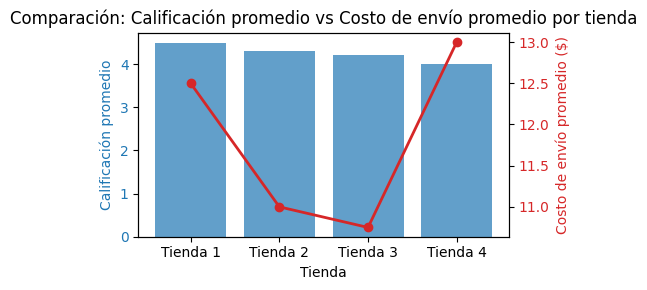


El gráfico muestra una relación interesante entre la satisfacción de los clientes y el costo de envío promedio en cada tienda.

Se observa que las Tiendas 1, 2 y 3 mantienen calificaciones altas (superiores a 4 puntos), mientras que la Tienda 4 presenta una calificación ligeramente menor. En paralelo, el costo de envío promedio presenta variaciones más marcadas: las Tiendas 2 y 3 tienen los costos más bajos, mientras que la Tienda 4 muestra el costo de envío más alto.

Esta diferencia sugiere una posible relación inversa entre el costo de envío y la calificación: cuando los costos de envío aumentan, la calificación promedio tiende a disminuir.

En términos prácticos, esto podría indicar que los clientes valoran una logística más económica o perciben menor satisfacción cuando el costo del envío es elevado. Por el contrario, las tiendas con envíos más eficientes o accesibles (como la Tienda 3) logran mantener una mejor evaluación general.

####6.- Mapa de calor de ventas

La menor dispersión geográfica de las ventas en la Tienda 4, en comparación con las otras tiendas, refuerza la conclusión de que es la menos eficiente. Una menor cobertura geográfica puede limitar su potencial de crecimiento y hacerla más vulnerable a cambios en las condiciones del mercado local. Si bien las otras métricas (ingresos, calificación, costo de envío) ya señalaban a la Tienda 4 como la candidata para la venta, el análisis geográfico añade una capa adicional de evidencia, mostrando que su desempeño no solo es menor en términos absolutos, sino que también su alcance geográfico es más limitado.



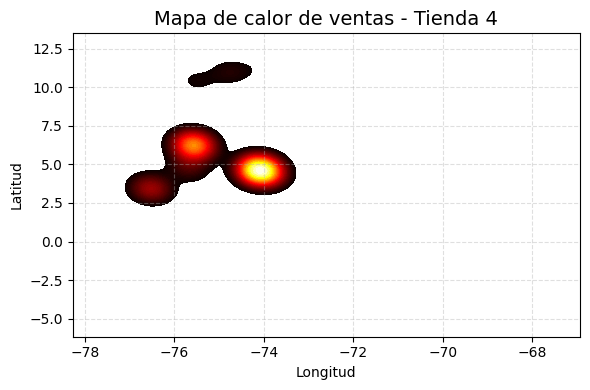




### Conclusión y Recomendación

Basándonos en el análisis exhaustivo de los datos de las cuatro tiendas de Alura Store, se concluye que la **Tienda 4** es la candidata más adecuada para ser vendida.

Esta recomendación se fundamenta en los siguientes hallazgos clave:

1.  **Ingresos Totales:** La Tienda 4 presenta consistentemente los ingresos totales más bajos en comparación con las otras tres tiendas. Esto indica un menor volumen de ventas y, consecuentemente, una menor contribución a la facturación general de la cadena.

2.  **Calificación Promedio de los Clientes:** La Tienda 4 registra la calificación promedio más baja por parte de los clientes. Una menor satisfacción del cliente puede impactar negativamente en la retención, la reputación y el potencial de crecimiento a largo plazo.

3.  **Costo de Envío Promedio:** El análisis reveló que la Tienda 4 tiene el costo de envío promedio más alto. Un costo de envío elevado puede ser un factor disuasorio para los clientes y reducir la competitividad de la tienda en el mercado.

4.  **Análisis Geográfico (Mapas de Calor):** Los mapas de calor de ventas muestran que la Tienda 4 tiene una concentración geográfica de ventas menos dispersa en comparación con las otras tiendas. Esto sugiere una base de clientes más localizada y una menor penetración en diferentes regiones, lo que limita su alcance y potencial de expansión.

Si bien la Tienda 4 comparte similitudes con las otras en cuanto a las categorías de productos más y menos populares, su desempeño general es inferior en métricas críticas como ingresos, satisfacción del cliente, costos operativos (envío) y alcance geográfico.

Considerando el objetivo del Sr. Juan de vender la tienda menos eficiente para iniciar un nuevo emprendimiento, la venta de la Tienda 4 liberaría recursos y permitiría enfocar esfuerzos en las tiendas con mejor rendimiento, maximizando así las oportunidades de éxito en el nuevo proyecto.